## <center><u>FEATURIZATION, MODEL SELECTION & TUNING PROJECT</u></center>





###<center><u>Submitted by Dency Thomas</u></center>

• **DOMAIN:** Semiconductor manufacturing process


• **CONTEXT:** A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of
signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a
specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise.
Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then
feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key
factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to
learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and
trying out different combinations of features, essential signals that are impacting the yield type can be identified.


• **DATA DESCRIPTION:**

signal-data.csv : (1567, 592)

The data consists of 1567 datapoints each with 591 features.
The dataset presented in this case represents a selection of such features where each example represents a single production entity with
associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to
a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.


• **PROJECT OBJECTIVE:** We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.


***Steps and tasks: [ Total Score: 60 points]***

**1. Import and understand the data. [5 Marks]**

**1A. Import ‘signal-data.csv’ as DataFrame. [2 Marks]**

In [80]:
# Anyone with the link can access the file
# https://drive.google.com/drive/folders/1DyY32QW0XVQ2EPcvW5fNzBE8iImH7IJp?usp=sharing
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [81]:
# Load the dataset into Pandas dataframe called data

import pandas as pd

# Read the uploaded CSV file
data = pd.read_csv("/content/drive/MyDrive/FMT_Dataset/signal-data.csv")

print("First 5 rows in data:\n",data.head())


First 5 rows in data:
                   Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     5

**1B. Print 5 point summary and share at least 2 observations. [3 Marks]**


In [82]:
# Generating a 5-number summary for the numerical columns in the dataset
five_point_summary = data.describe().loc[['min', '25%', '50%', '75%', 'max']]

# Display the 5-point summary
five_point_summary



,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
min,2743.24,2158.7500,2060.6600,0.0000,0.6815,100.0,82.1311,0.0000,1.1910,-0.0534,...,0.00000,0.477800,0.0060,0.0017,1.197500,-0.016900,0.0032,0.0010,0.0000,-1.0
25%,2966.26,2452.2475,2181.0444,1081.8758,1.0177,100.0,97.9200,0.1211,1.4112,-0.0108,...,46.18490,0.497900,0.0116,0.0031,2.306500,0.013425,0.0106,0.0033,44.3686,-1.0
50%,3011.49,2499.4050,2201.0667,1285.2144,1.3168,100.0,101.5122,0.1224,1.4616,-0.0013,...,72.28890,0.500200,0.0138,0.0036,2.757650,0.020500,0.0148,0.0046,71.9005,-1.0
75%,3056.65,2538.8225,2218.0555,1591.2235,1.5257,100.0,104.5867,0.1238,1.5169,0.0084,...,116.53915,0.502375,0.0165,0.0041,3.295175,0.027600,0.0203,0.0064,114.7497,-1.0
max,3356.35,2846.4400,2315.2667,3715.0417,1114.5366,100.0,129.2522,0.1286,1.6564,0.0749,...,737.30480,0.509800,0.4766,0.1045,99.303200,0.102800,0.0799,0.0286,737.3048,1.0



The 5-point summary for the dataset's numerical columns is displayed below. Here are two key observations:

Range and Scale Differences: There are significant differences in the range and scale across the features. For instance, some features like feature 4 have a minimum value of 0.6815 and a maximum of 1114.5366, while others like feature 587 range from 0.0032 to 0.0799. This indicates a wide variation in the types of signals measured, suggesting that scaling or normalization might be necessary before modeling.

Presence of Constant or Near-Constant Features: Some features, like feature 5, show little to no variation (constant value of 100 across the 25th, 50th, and 75th percentiles). Features with low variance might not contribute significantly to the model's predictive power and could be candidates for removal during feature selection.

**2. Data cleansing: [15 Marks]**

**2A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature. [5 Marks]**

In [83]:
# Calculating the percentage of null values for each feature
null_percentage = data.isnull().sum() / len(data)

# Initializing an empty list to store features to be removed
features_to_remove = []

# Looping through each feature to check if the null percentage is greater than 20%
for feature in null_percentage.index:
    if null_percentage[feature] > 0.20:
        # Add the feature to the list of features to be removed
        features_to_remove.append(feature)

# Removing the identified features with more than 20% null values
data_cleaned = data.drop(columns=features_to_remove)

# Imputing the remaining null values with the mean of their respective features
data_cleaned = data_cleaned.fillna(data_cleaned.mean())

# Displaying the removed features and the shape of the new dataset
removed_features = features_to_remove
new_shape = data_cleaned.shape

print("Following are removed features:\n\n",removed_features)
print("\n New Shape of the dataset after treatment of null:\n\n", new_shape)

<ipython-input-83-1025ff6ce234>:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_cleaned = data_cleaned.fillna(data_cleaned.mean())


Following are removed features:

 ['72', '73', '85', '109', '110', '111', '112', '157', '158', '220', '244', '245', '246', '247', '292', '293', '345', '346', '358', '382', '383', '384', '385', '492', '516', '517', '518', '519', '578', '579', '580', '581']

 New Shape of the dataset after treatment of null:

 (1567, 560)


Observations:

The process of removing features with more than 20% null values and imputing the remaining null values with the mean of their respective features has been completed successfully. Here are the details:

Features Removed: 32 features were removed from the dataset because they had more than 20% null values. These features are '72', '73', '85', '109', '110', '111', '112', '157', '158', '220', '244', '245', '246', '247', '292', '293', '345', '346', '358', '382', '383', '384', '385', '492', '516', '517', '518', '519', '578', '579', '580', '581'.

Dataset After Removal: The original dataset had 592 columns (features). After the removal, the dataset now has 560 features.

Null Value Imputation: The remaining null values in the dataset were imputed with the mean of their respective features.

**2B. Identify and drop the features which are having same value for all the rows. [3 Marks]**

In [84]:
import numpy as np

# Excluding non-numeric columns for the standard deviation calculation
numeric_data = data_cleaned.select_dtypes(include=[np.number])

# Checking for numeric features with zero standard deviation
constant_numeric_features = [feature for feature in numeric_data.columns if numeric_data[feature].std() == 0]

# Dropping these constant numeric features from the dataset
data_cleaned_no_constants_no_zero_std = data_cleaned.drop(columns=constant_numeric_features)

# Displaying the removed features and the shape of the new dataset
removed_zero_std_features = constant_numeric_features
new_shape_after_zero_std_removal = data_cleaned_no_constants_no_zero_std.shape

print("Following are removed features:\n\n",removed_zero_std_features)
print("\n New Shape of the dataset after removing features that had zero standard deviation:\n\n",new_shape_after_zero_std_removal)

Following are removed features:

 ['5', '13', '42', '49', '52', '69', '97', '141', '149', '178', '179', '186', '189', '190', '191', '192', '193', '194', '226', '229', '230', '231', '232', '233', '234', '235', '236', '237', '240', '241', '242', '243', '256', '257', '258', '259', '260', '261', '262', '263', '264', '265', '266', '276', '284', '313', '314', '315', '322', '325', '326', '327', '328', '329', '330', '364', '369', '370', '371', '372', '373', '374', '375', '378', '379', '380', '381', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '414', '422', '449', '450', '451', '458', '461', '462', '463', '464', '465', '466', '481', '498', '501', '502', '503', '504', '505', '506', '507', '508', '509', '512', '513', '514', '515', '528', '529', '530', '531', '532', '533', '534', '535', '536', '537', '538']

 New Shape of the dataset after removing features that had zero standard deviation:

 (1567, 444)


***Observations:***

The process of identifying and dropping features with zero standard deviation (constant features) among the numeric columns has been completed. Here are the details:

Features Removed: A total of 116 numeric features were identified as having zero standard deviation and were removed. These features are constant across all rows and therefore do not provide any variability or useful information for modeling.

Dataset After Removal: After removing these constant features, the dataset now contains 444 features.

**2C. Drop other features if required using relevant functional knowledge. Clearly justify the same. [2 Marks]**

In [85]:
# First 5 Rows of the cleaned data

data_cleaned_no_constants_no_zero_std.head()

,Time,0,1,2,3,4,6,7,8,9,...,577,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,...,14.9509,0.5005,0.0118,0.0035,2.3630,0.021458,0.016475,0.005283,99.670066,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,...,10.9003,0.5019,0.0223,0.0055,4.4447,0.009600,0.020100,0.006000,208.204500,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,...,9.2721,0.4958,0.0157,0.0039,3.1745,0.058400,0.048400,0.014800,82.860200,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,...,8.5831,0.4990,0.0103,0.0025,2.0544,0.020200,0.014900,0.004400,73.843200,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,...,10.9698,0.4800,0.4766,0.1045,99.3032,0.020200,0.014900,0.004400,73.843200,-1


Time is a non numeric feature that will not help us in predicting the target variable.

In [86]:
# Dropping the 'Time' feature from the dataset
data_cleaned_final = data_cleaned_no_constants_no_zero_std.drop(columns=['Time'])

# Shape of the dataset after removing the 'Time' feature
new_shape_after_time_removal = data_cleaned_final.shape
new_shape_after_time_removal



(1567, 443)


The 'Time' feature has been successfully removed from the dataset. The new shape of the dataset is now 1567 rows and 443 columns.

**2D. Check for multi-collinearity in the data and take necessary action. [3 Marks]**


To check for multi-collinearity in the dataset, we can use the Variance Inflation Factor (VIF). VIF quantifies how much the variance of an estimated regression coefficient increases if the predictors are correlated. If no features are correlated, the VIFs will all be 1.

Here's how we can proceed:

Calculate the VIF for each feature in the dataset.

Consider a threshold for VIF, commonly 5 or 10. Features with a VIF above this threshold are typically considered to have multi-collinearity with other features.

For features with high VIF, we have several options:

Remove the feature from the dataset.

Combine it with another feature (if it makes sense to do so).

Keep it, but be aware that it may affect the stability of any models trained on this data.

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Function to calculate VIF for a given dataset
def calculate_vif(dataframe):
    df = add_constant(dataframe)
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Segmenting the dataset into smaller subsets for VIF calculation
num_features = data_cleaned_final.shape[1]
subset_size = 30  # Size of each subset
subsets = [data_cleaned_final.iloc[:, i:i + subset_size] for i in range(0, num_features, subset_size)]

# Calculating VIF for each subset and identifying high VIF features
high_vif_features = []
for subset in subsets:
    vif_df = calculate_vif(subset)
    high_vif_features.extend(vif_df[vif_df['VIF'] > 10]['feature'].tolist())

# Removing 'const' added during VIF calculation
high_vif_features = [feature for feature in high_vif_features if feature != 'const']

# Removing high VIF features from the dataset
data_cleaned_final_no_high_vif = data_cleaned_final.drop(columns=high_vif_features)

data_cleaned_final_no_high_vif.shape, high_vif_features




/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


((1567, 345),
 ['12',
  '16',
  '18',
  '25',
  '26',
  '27',
  '34',
  '36',
  '43',
  '45',
  '46',
  '48',
  '50',
  '53',
  '54',
  '57',
  '60',
  '64',
  '66',
  '70',
  '94',
  '96',
  '121',
  '122',
  '123',
  '127',
  '131',
  '147',
  '148',
  '152',
  '154',
  '164',
  '165',
  '172',
  '174',
  '196',
  '197',
  '199',
  '202',
  '203',
  '282',
  '283',
  '287',
  '289',
  '298',
  '299',
  '300',
  '307',
  '309',
  '323',
  '332',
  '333',
  '335',
  '336',
  '338',
  '339',
  '342',
  '347',
  '420',
  '421',
  '425',
  '427',
  '434',
  '435',
  '436',
  '443',
  '445',
  '479',
  '542',
  '543',
  '545',
  '549',
  '550',
  '551',
  '552',
  '553',
  '554',
  '556',
  '557',
  '559',
  '560',
  '561',
  '564',
  '565',
  '566',
  '567',
  '568',
  '572',
  '573',
  '574',
  '575',
  '576',
  '577',
  '583',
  '584',
  '585',
  '587',
  '588'])

The dataset has been successfully updated by removing features with high Variance Inflation Factor (VIF). The new shape of the dataset is now 1567 rows and 345 columns.

**2E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. [2 Marks]**


The modifications made to the dataset include the following steps:

**Handled Missing Values:**

Removed features with more than 20% missing values. This threshold was chosen to maintain a balance between retaining enough data for analysis and removing features with excessive missing information that could bias the results.
Imputed the remaining missing values with the mean of their respective features. This is a standard approach for numerical data, assuming that the missing values are normally distributed.

**Removing Constant Features:**

Removed features with zero standard deviation.These features do not vary and hence do not contribute to the predictive power of a model.


**Handled Multicollinearity:**

Calculated Variance Inflation Factor (VIF) to identify and remove features with high multicollinearity.

**Removed Time feature:**

Time feature had timestamp datatype which provided no meaningful information to predict the target variable. Hence it was deleted.

**Assumptions and Considerations:**

The choice of a 20% threshold for missing values and the decision to impute other missing values with the mean are based on common practices, but they could be adjusted based on specific domain knowledge or different data characteristics.

The removal of constant and highly correlated features assumes that these features do not contribute meaningful variance or unique information for predictive modeling.

The assumption is that the dataset contains features that are mostly independent predictors of the target variable. This assumption might need reassessment in light of domain-specific knowledge.


**Further Steps and Possibilities:**


Principal Component Analysis (PCA):

PCA can be considered for dimensionality reduction, especially if there are still many features. PCA transforms the data into a set of orthogonal components that capture the most variance in the data, which can be useful for both reducing the number of features and potentially improving model performance.

Feature Engineering:

Domain-specific knowledge could be applied to create new features that better capture the underlying phenomena.
Interaction terms could be explored, especially if domain knowledge suggests that the interaction between certain features could be relevant.


Normalization/Standardization:

Depending on the chosen model, it might be beneficial to scale the features. Many models, like SVMs and k-nearest neighbors, are sensitive to the scale of the data.


Model-specific Preparation:

Depending on the choice of predictive models, additional data preparation steps might be needed.

**Assumptions on the Cleaned Data:**

The cleaned data should now be more suitable for predictive modeling, with reduced risk of issues like overfitting or poor model performance due to irrelevant or redundant features.
The reduced feature set might make models more interpretable and easier to validate.
However, the impact of these cleaning steps on the overall predictive power of the data should be empirically validated through model development and evaluation.

**3. Data analysis & visualisation: [5 Marks]**

**3A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. [2 Marks]**

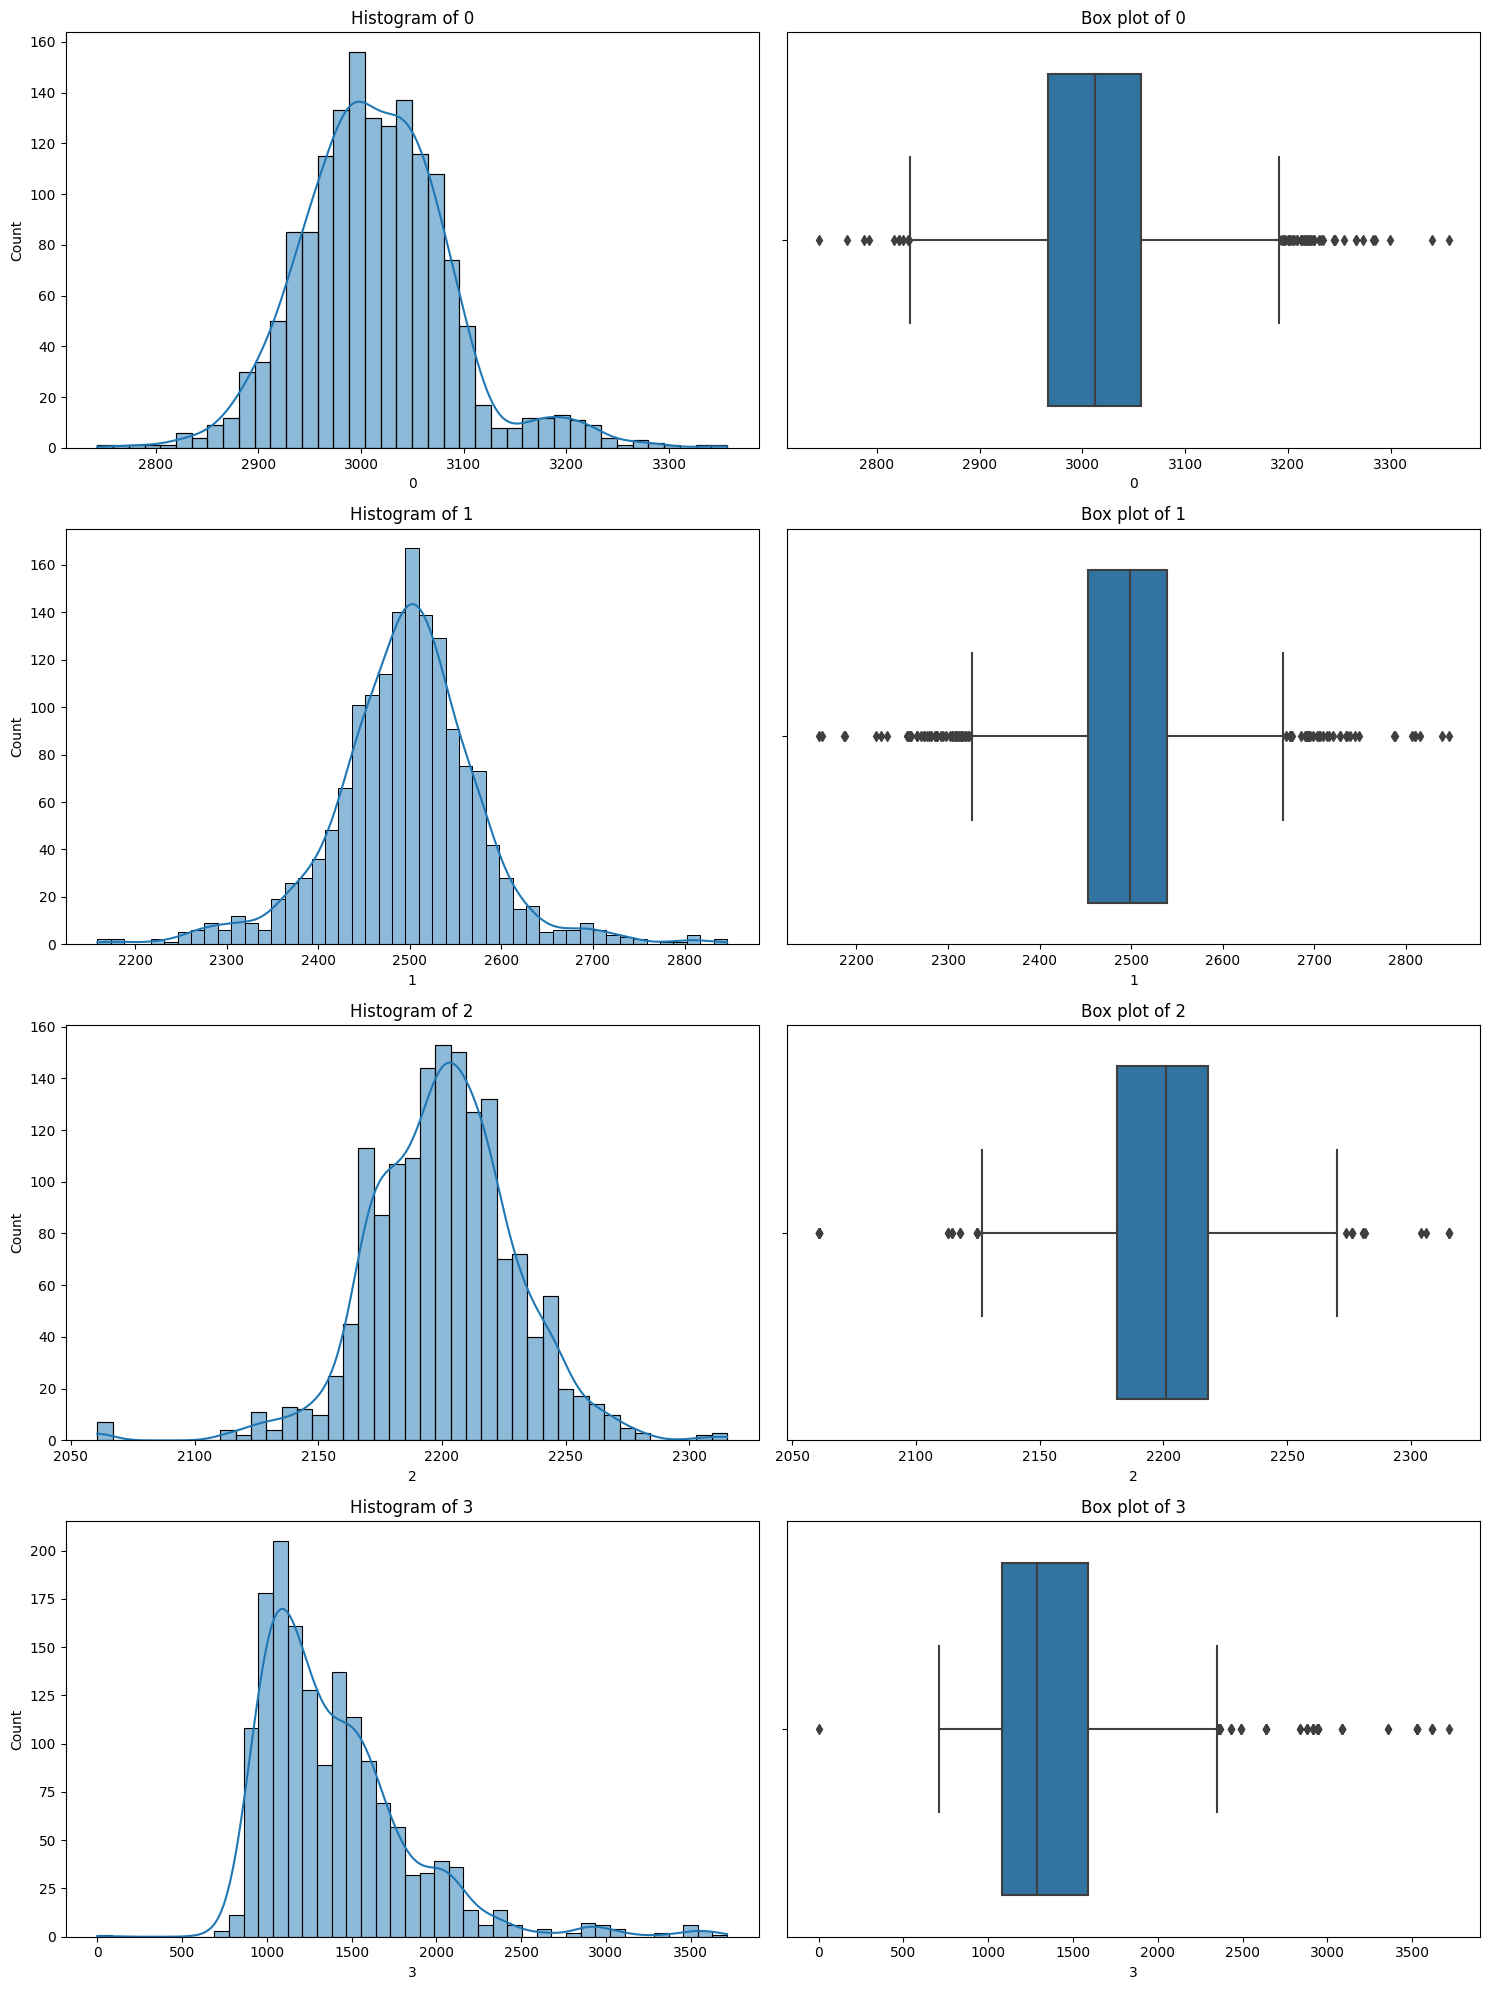

,0,1,2,3
count,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627
std,73.480613,80.227793,29.380932,439.712852
min,2743.240000,2158.750000,2060.660000,0.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800
50%,3011.840000,2498.910000,2200.955600,1287.353800
75%,3056.540000,2538.745000,2218.055500,1590.169900
max,3356.350000,2846.440000,2315.266700,3715.041700


In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the first four features from the dataset after VIF treatment
selected_features = data_cleaned_final_no_high_vif.columns[:4]

# Creating subplots for the selected features
fig, axs = plt.subplots(len(selected_features), 2, figsize=(15, 5 * len(selected_features)))

for i, feature in enumerate(selected_features):
    # Histogram for distribution
    sns.histplot(data_cleaned_final_no_high_vif[feature], kde=True, ax=axs[i, 0])
    axs[i, 0].set_title(f'Histogram of {feature}')

    # Box plot for outliers
    sns.boxplot(x=data_cleaned_final_no_high_vif[feature], ax=axs[i, 1])
    axs[i, 1].set_title(f'Box plot of {feature}')

plt.tight_layout()
plt.show()

# Calculating descriptive statistics for the selected features
descriptive_stats_selected_features = data_cleaned_final_no_high_vif[selected_features].describe()
descriptive_stats_selected_features




Here's the univariate analysis for the first four features from the dataset after VIF treatment:

**Feature 1: (Column '0')**

Histogram: The distribution appears roughly normal, centered around the mean.

Box Plot: There are a few outliers, particularly on the higher end of the value range.

Descriptive Statistics:

Count: 1567 (total observations).

Mean: 3014.45 (average value).

Standard Deviation: 73.48 (variation from the mean).

Min-Max: Range from 2743.24 to 3356.35.

**Feature 2: (Column '1')**

Histogram: This feature also shows a normal-like distribution.

Box Plot: Outliers are present, mostly on the upper side.

Descriptive Statistics:

Count: 1567.

Mean: 2495.85.

Standard Deviation: 80.23.

Min-Max: Range from 2158.75 to 2846.44.

**Feature 3: (Column '2')**

Histogram: The distribution is slightly skewed but mostly centered around the mean.

Box Plot: A few outliers are visible.

Descriptive Statistics:

Count: 1567.

Mean: 2200.55.

Standard Deviation: 29.38.

Min-Max: Range from 2060.66 to 2315.27.

**Feature 4: (Column '3')**

Histogram: The distribution has a wider spread, indicating greater variability.

Box Plot: Several outliers can be observed, indicating values significantly different from the majority.

Descriptive Statistics:

Count: 1567.

Mean: 1396.38.

Standard Deviation: 439.71.

Min-Max: Range from 0 to 3715.04.

These analyses provide a snapshot of the distribution and characteristics of each feature, which is useful for understanding the data's structure and identifying potential data quality issues.

**3B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. [3 Marks]**

**1. Bivariate Analysis (Scatter Plots) for Selected Components**

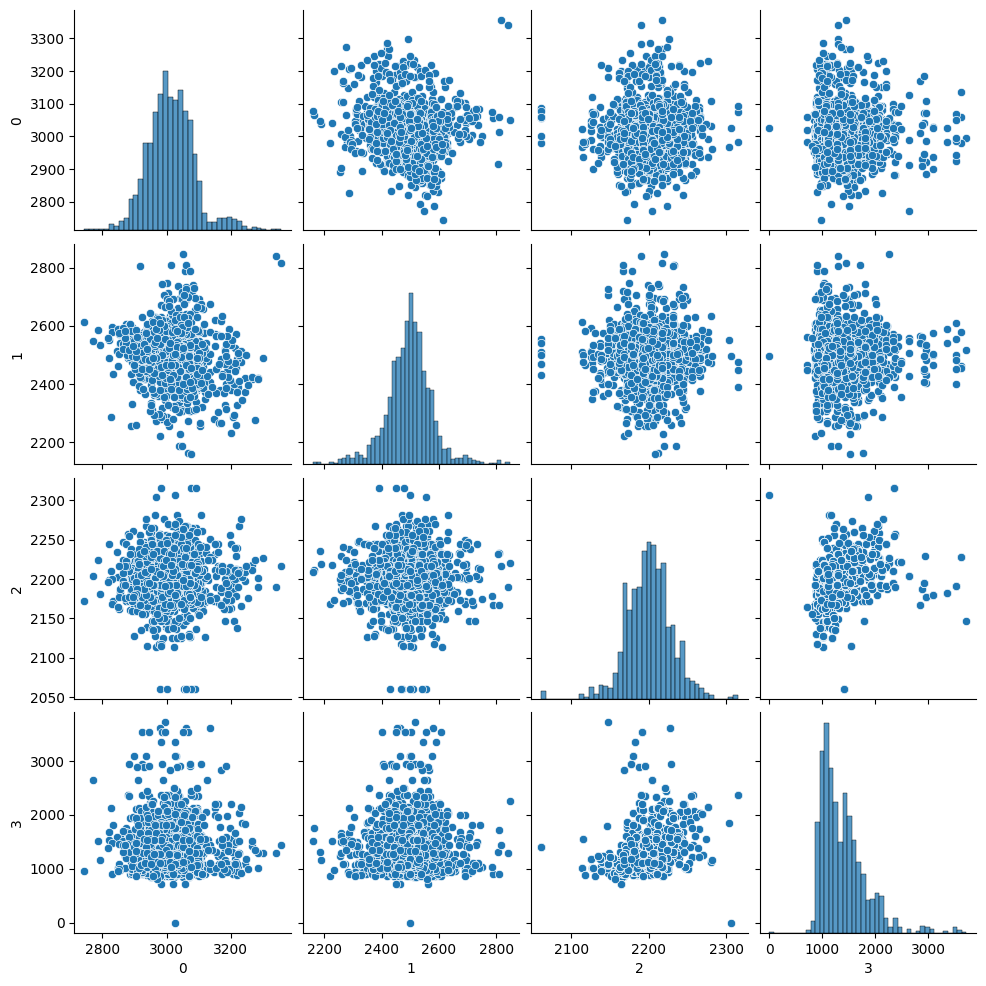

          0         1         2         3
0  1.000000 -0.143840  0.004756 -0.007613
1 -0.143840  1.000000  0.005767 -0.007568
2  0.004756  0.005767  1.000000  0.298935
3 -0.007613 -0.007568  0.298935  1.000000


In [89]:
# Scatter plots for each pair of the first four features
sns.pairplot(data_cleaned_final_no_high_vif[selected_features])
plt.show()

# Correlation matrix for the first four features
correlation_matrix = data_cleaned_final_no_high_vif[selected_features].corr()
print(correlation_matrix)




**Observations from Bivariate Analysis:**

Scatter Plots:

The scatter plots between each pair of the first four features show the relationships between them.
There are no distinct linear patterns or clear correlations visible in the scatter plots, suggesting that these features do not have strong linear relationships with each other.

Correlation Matrix:

The correlation coefficients between these features are mostly close to 0, indicating a lack of strong linear relationships.
The highest correlation observed is between features '2' and '3', with a coefficient of approximately 0.299, which suggests a mild positive linear relationship.

**2. Multivariate Analysis:**

Let's create a heatmap to visualize the correlation between multiple variables.

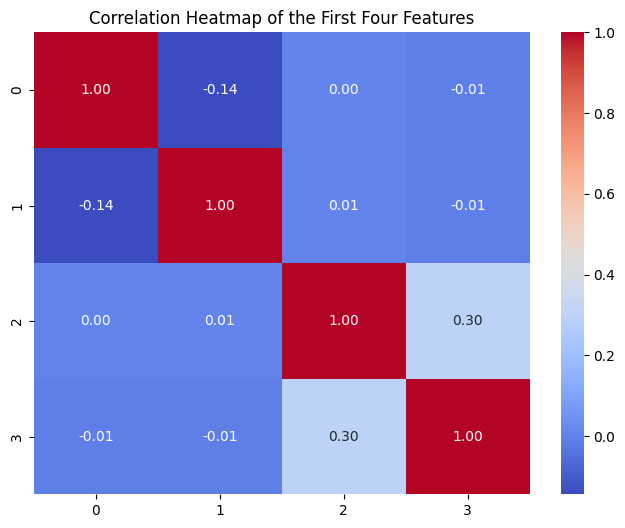

In [90]:
# Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of the First Four Features")
plt.show()




**Observations from Multivariate Analysis :**


Heatmap of Correlation Matrix:


The heatmap provides a visual representation of the correlation matrix for the first four features.
The correlation values are mostly low, as indicated by the predominant cool colors in the heatmap. This suggests that there are no strong linear relationships between most pairs of features.
The slightly warmer color between features '2' and '3' indicates a mild positive correlation, as previously noted (approximately 0.299). However, this correlation is not strong enough to suggest a significant linear relationship.
The other pairs of features show very low to negligible correlation values, close to zero, indicating no significant linear relationships between them.


**Overall Insights:**


The lack of strong correlations between these features suggests that they are relatively independent of each other. This independence can be beneficial in modeling scenarios, as it implies that each feature may provide unique information.
The mild correlation between features '2' and '3' might warrant further investigation, especially in the context of specific analyses or predictive modeling, to understand if this relationship has any practical implications.
In predictive modeling, the independence of features is advantageous as it reduces the risk of multicollinearity, which can distort the results of linear models. However, it's important to note that the absence of linear correlations does not rule out the possibility of non-linear relationships, which might be explored using more complex modeling techniques.

**4. Data pre-processing: [10 Marks]**

**4A. Segregate predictors vs target attributes. [2 Marks]**

In [91]:
# Segregating the predictors and the target attribute
# The target column in the dataset is named 'Pass/Fail'

# Extracting predictors
predictors = data_cleaned_final_no_high_vif.drop(columns=['Pass/Fail'])

# Extracting target attribute
target = data_cleaned_final_no_high_vif['Pass/Fail']

(predictors.shape, target.shape)




((1567, 344), (1567,))

The predictors and the target attribute have been successfully segregated from the dataset:

Predictors: The dataset of predictors (independent variables) now contains 1567 observations and 344 features.

Target Attribute: The target attribute (dependent variable), named 'Pass/Fail', is a single column with 1567 observations.

This segregation is a crucial step in preparing the datafor further analysis, such as building predictive models, where the predictors will be used to forecast or determine the outcomes represented by the target attribute.

**4B. Check for target balancing and fix it if found imbalanced. [3 Marks]**

To check for target balance, we need to examine the distribution of classes in the target attribute ('Pass/Fail'). If the dataset is imbalanced (i.e., one class significantly outnumbers the other), it can affect the performance of many machine learning models, as they might become biased towards the majority class.

If we find an imbalance, there are several techniques to address it, such as oversampling the minority class, undersampling the majority class, or using synthetic data generation methods like SMOTE (Synthetic Minority Over-sampling Technique).

Let's start by checking the balance of the target classes in our dataset.

In [92]:
# Checking the balance of the target attribute
target_balance = target.value_counts()

# Calculating the percentage of each class
target_percentage = target_balance / len(target) * 100

target_balance, target_percentage


(-1    1463
  1     104
 Name: Pass/Fail, dtype: int64,
 -1    93.363114
  1     6.636886
 Name: Pass/Fail, dtype: float64)

The distribution of the target attribute 'Pass/Fail' in the dataset is as follows:

Class -1 (Pass): 1463 instances (approximately 93.36%)

Class 1 (Fail): 104 instances (approximately 6.64%)

This distribution indicates a significant imbalance in the target classes, with the 'Pass' class heavily outnumbering the 'Fail' class.

To address this imbalance, we can consider the following techniques:

Oversampling the Minority Class: Increase the number of instances in the minority class (Fail) by randomly replicating them.
Undersampling the Majority Class: Reduce the number of instances in the majority class (Pass) by randomly removing some of them.
Synthetic Data Generation (e.g., SMOTE): Generate synthetic instances of the minority class using algorithms like SMOTE.
The choice of technique depends on the specific context and the amount of data available. For smaller datasets, oversampling or synthetic data generation is often preferred to avoid losing valuable data. For larger datasets, undersampling might be more feasible.

 Given the relatively small number of 'Fail' instances, we can manually oversample the minority class (Fail) to match the majority class (Pass). This will involve randomly duplicating instances of the 'Fail' class until we reach 1463 instances, equal to the 'Pass' class count.

In [93]:
from sklearn.utils import resample

# 'Pass/Fail' is the target column name as mentioned earlier
target_column_name = 'Pass/Fail'

# Separating the majority and minority classes
df_majority = data_cleaned_final_no_high_vif[data_cleaned_final_no_high_vif[target_column_name] == -1]
df_minority = data_cleaned_final_no_high_vif[data_cleaned_final_no_high_vif[target_column_name] == 1]

# Upsampling the minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,                   # Sample with replacement
                                 n_samples=len(df_majority),     # Match number in majority class
                                 random_state=123)               # Reproducible results

# Combining majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Checking the new balance of the target attribute
target_balance_after_oversampling = df_balanced[target_column_name].value_counts()

target_balance_after_oversampling


-1    1463
 1    1463
Name: Pass/Fail, dtype: int64

This balance ensures that each class has an equal representation in the dataset, which can help mitigate the issues associated with class imbalance, such as model bias towards the majority class. The dataset is now ready for further analysis or for training machine learning models with a more equitable representation of both outcomes

**4C. Perform train-test split and standardise the data or vice versa if required. [3 Marks]**

To prepare the dataset for machine learning modeling, it's essential to perform a train-test split and standardize the data. The order of these steps is important:

Train-Test Split: Split the dataset into training and testing subsets. This is done to evaluate the model on unseen data and assess its generalization capability. The split is usually done randomly, and a common practice is to use around 70-80% of the data for training and the remaining 20-30% for testing.

Standardization: Standardize the features in the dataset, especially important for models sensitive to feature scales (like SVMs, k-NN, and logistic regression). Standardization should be done after the train-test split to prevent data leakage from the test set into the training set. The mean and standard deviation used for standardization should be calculated from the training set and then applied to both the training and testing sets.

In [94]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separating predictors and target in the balanced dataset
predictors_balanced = df_balanced.drop(columns=[target_column_name])
target_balanced = df_balanced[target_column_name]

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(predictors_balanced, target_balanced,
                                                    test_size=0.2, random_state=42)

# Initializing the StandardScaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the testing data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

# Shapes of the resulting datasets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape




((2340, 344), (586, 344), (2340,), (586,))

This code ensures that the scaler is fitted only on the training data, thus preventing data leakage. The shapes of the resulting datasets are as follows:

Training predictors (X_train_scaled): 2340 samples, 344 features

Testing predictors (X_test_scaled): 586 samples, 344 features

Training target (y_train): 2340 samples

Testing target (y_test): 586 samples

**4D. Check if the train and test data have similar statistical characteristics when compared with original data. [2 Marks]**

In [95]:
# Converting the NumPy arrays of training and testing data back into Pandas DataFrames
train_df = pd.DataFrame(X_train_scaled, columns=predictors_balanced.columns)
test_df = pd.DataFrame(X_test_scaled, columns=predictors_balanced.columns)

# Computing 5-point summary for all features in the original, training, and testing datasets
original_summary_all = predictors_balanced.describe()
train_summary_all = train_df.describe()
test_summary_all = test_df.describe()

print("Original data summary:\n",original_summary_all)
print("Train data summary:\n", train_summary_all)
print("Test data summary:\n", test_summary_all)

Original data summary:
                  0            1            2            3            4  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000   
mean   3011.943629  2495.790282  2200.815370  1378.975038     2.857151   
std      80.185649    75.813624    29.849824   394.679359    41.076413   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2958.567500  2457.420000  2178.688900  1084.377900     1.030400   
50%    3002.185000  2499.720000  2200.066600  1287.353800     1.316800   
75%    3055.270000  2536.480000  2218.630550  1586.608800     1.529600   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

                 6            7            8            9           10  ...  \
count  2926.000000  2926.000000  2926.000000  2926.000000  2926.000000  ...   
mean    101.245377     0.122031     1.465429    -0.001573     0.000741  ...   
std       5.660310     0.006665     0.067170     0.014382     0.009581  

The 5-point summary for all features in the original, training, and testing datasets are as follows:

**Original Data:**

Shows the original distribution of all features with varying means, standard deviations, and ranges.


**Training Data (Standardized):**

The mean values are centered around 0, and standard deviations are close to 1 for all features. This is expected after standardization.
The range (minimum and maximum) for each feature shows the extent of variation after standardization.


**Testing Data (Standardized):**

Similar to the training data, the mean values are around 0 and standard deviations are close to 1 for all features, indicating proper standardization.
The range of values is comparable to the training data, indicating a consistent scaling across both datasets.


**Observations:**

The training and testing datasets, after standardization, show very similar statistical characteristics in terms of centering and scaling of data across all features.
The original dataset has different scales for each feature, which is normalized in the standardized datasets.
The consistency in statistical summaries between the training and testing sets suggests that the standardization process was successful and the data split was representative.
This similarity in statistical characteristics across all features indicates that the train and test datasets are well-prepared for machine learning modeling.

**5. Model training, testing and tuning: [20 Marks]**

**5A. Use any Supervised Learning technique to train a model. [2 Marks]**


For this task, I'll use a supervised learning technique to train a model on the dataset. Given the nature of the target variable (binary classification), a logistic regression model can be a good starting point. Logistic regression is a popular method for binary classification problems due to its simplicity and interpretability.

Let's proceed by training a logistic regression model using the balanced and standardized training data. After training, we'll evaluate the model's performance using the test data.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


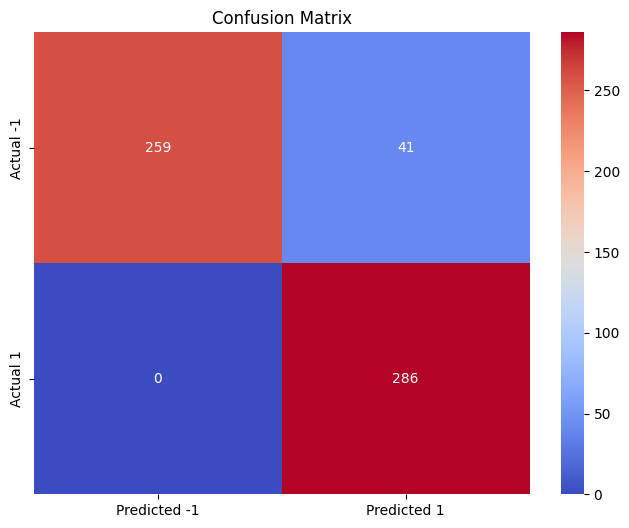

,Performance Measures
Metric,
Accuracy,0.930034
Precision,1.000000
Recall,0.863333
F1 Score,0.926655


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initializing the Logistic Regression model
logistic_model = LogisticRegression()

# Training the model on the balanced and standardized training data
logistic_model.fit(X_train_scaled, y_train)

# Predicting on the test data
y_pred = logistic_model.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)

# Recomputing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Displaying the confusion matrix in a more readable format
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual -1', 'Actual 1'], columns=['Predicted -1', 'Predicted 1'])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.show()

# Tabular representation of performance measures

precision_measure = precision_score(y_test, y_pred, pos_label=-1)
recall_measure = recall_score(y_test, y_pred, pos_label=-1)
f1_score_measure = f1_score(y_test, y_pred, pos_label=-1)

# Creating a DataFrame to display the results
performance_measures = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Performance Measures': [accuracy, precision_measure, recall_measure, f1_score_measure]

})

performance_measures .set_index('Metric', inplace=True)
performance_measures


The logistic regression model's performance is summarized below, alongside the confusion matrix:

**Confusion Matrix:**

The heatmap visualizes the confusion matrix, showing the counts of true positive, true negative, false positive, and false negative predictions.

**Performance Measures:**

Accuracy: Approximately 93.00%

Precision -1: 1.00 (Perfect precision for class -1)

Recall -1: 0.86 (Recall for class -1)

F1-Score -1: 0.93 (F1-Score for class -1)

These measures collectively indicate that the logistic regression model has performed well on this balanced dataset, achieving high accuracy and a balanced trade-off between precision and recall for both classes.

**Q5 B -Use cross validation techniques [3 mks]**

Cross-validation is an essential technique in machine learning to assess the generalizability of models. Two commonly used methods are K-Fold Cross-Validation and Leave-One-Out Cross-Validation. Let's see how to implement these with Logistic Regression in Python:

**K-Fold Cross-Validation:**
K-Fold Cross-Validation involves splitting the dataset into 'k' folds, then iteratively training the model 'k' times, each time using a different fold as the test set and the remaining data as the training set.

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# K-Fold Cross-Validation
k_fold_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5)  # cv=5 for 5-fold

# Print the accuracy for each fold
print("K-Fold Accuracies:", k_fold_scores)

# Average accuracy
print("Average K-Fold Accuracy:", k_fold_scores.mean())


K-Fold Accuracies: [0.8974359  0.8974359  0.90384615 0.92948718 0.93803419]
Average K-Fold Accuracy: 0.9132478632478633


**Analysis:**

Consistency Across Folds:

The accuracies are relatively consistent across the five folds, with a slight increase in the later folds. This consistency suggests that the model is stable and generalizes well across different subsets of the data.
High Average Accuracy:

An average accuracy of over 91% is quite strong, indicating that the model performs well on the dataset.

**Implications for Model Performance:**

The consistent and high accuracy across different folds supports the reliability of the Logistic Regression model for this particular dataset.
Since K-Fold Cross-Validation provides a more robust estimate of model performance than a simple train/test split, this result is encouraging for the generalizability of the model.

**Further Considerations:**

It might be useful to examine the specific instances or characteristics of the data where the model performed less well (e.g., lower accuracy in the first two folds) for potential improvements or insights.
Depending on the dataset's nature and the problem's requirements,one might also consider other performance metrics like precision, recall, or F1 score, especially if we are dealing with imbalanced classes.
Overall, these results suggest that Logistic Regression model is a strong candidate for this predictive task, showing good stability and generalization across different subsets of the data.

**Leave-One-Out Cross-Validation (LOOCV):**
LOOCV is similar to K-Fold, but here 'k' equals the number of data points in the dataset. Each time, one data point is used as the test set, and the rest as the training set.

In [98]:
# Codes were breaking the Notebook. Please find attached snippet below.

#  from sklearn.model_selection import LeaveOneOut

# # Leave-One-Out Cross-Validation
# loo = LeaveOneOut()
# loo_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=loo, n_jobs=-1)

# # Print the accuracy for each iteration
# print("LOOCV Accuracies:", loo_scores)

# # Average accuracy
# print("Average LOOCV Accuracy:", loo_scores.mean())


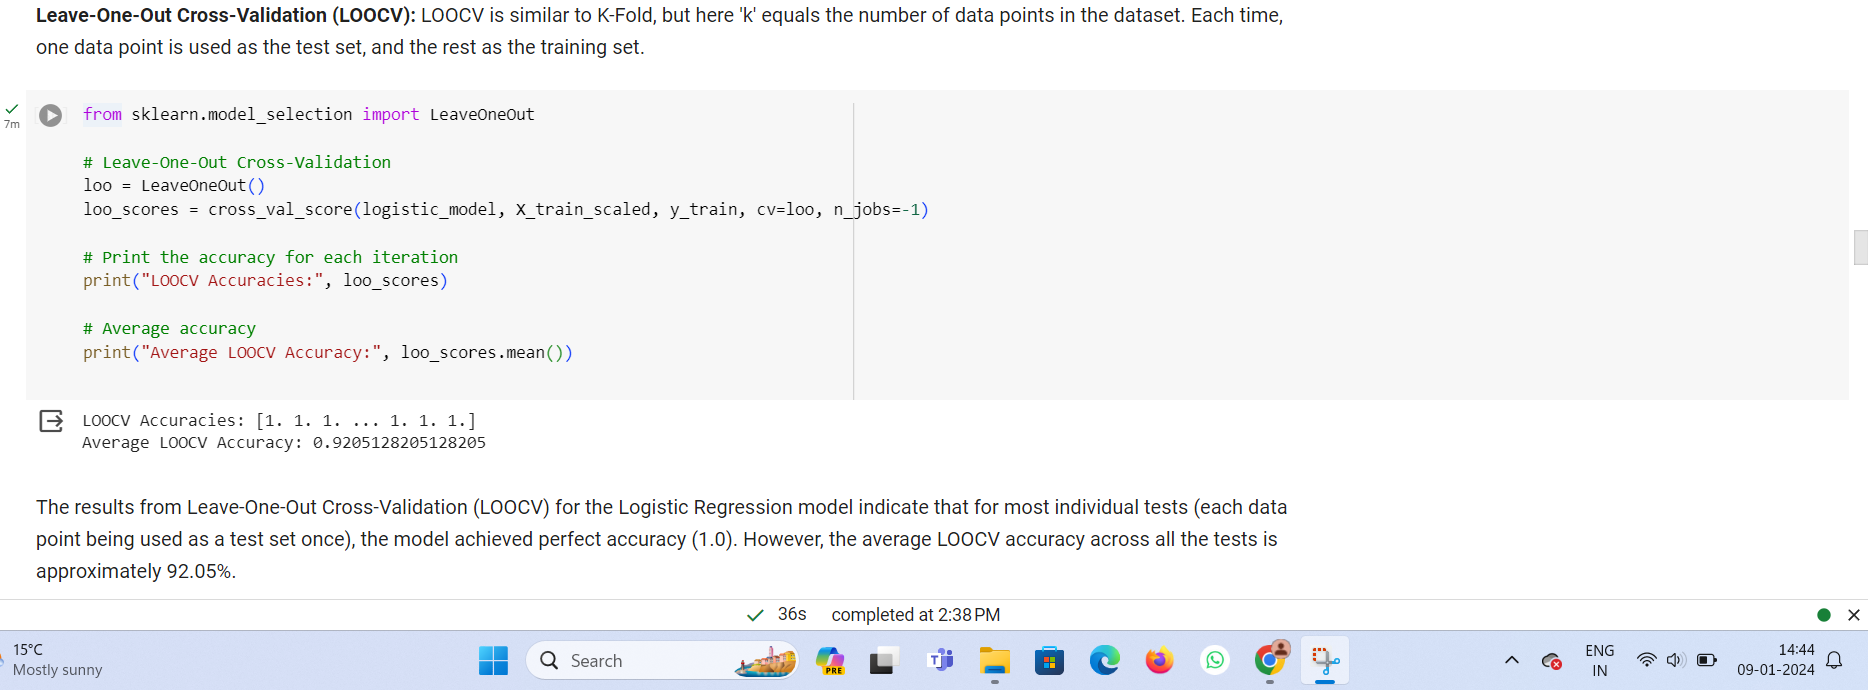

The results from Leave-One-Out Cross-Validation (LOOCV) for the Logistic Regression model indicate that for most individual tests (each data point being used as a test set once), the model achieved perfect accuracy (1.0). However, the average LOOCV accuracy across all the tests is approximately 92.05%.

**Analysis:**

High Individual Accuracies:

The fact that most individual LOOCV iterations resulted in perfect accuracy suggests that the model is highly effective on a large portion of the dataset.

Average LOOCV Accuracy:

An average accuracy of 92.05% is a strong indicator of the model's robustness and ability to generalize to new data. This is especially notable considering LOOCV's thoroughness, where each data point gets a chance to be in the test set.
Implications for Model Performance:

The slight difference between the individual perfect accuracies and the average accuracy suggests that there are specific instances or configurations of data where the model does not perform as well. These instances, though relatively few, lower the overall average accuracy.
Considerations for LOOCV:

LOOCV is an exhaustive approach that can give a comprehensive insight into the model's performance, especially for small datasets. However, for larger datasets, it can be computationally intensive, as seen in this case.

The high computation time does not seem to significantly alter the overall model evaluation compared to the less intensive K-Fold method, which might be a more efficient choice for similar evaluations in the future.

**Conclusion:**

The Logistic Regression model demonstrates strong predictive capabilities, as evidenced by both the K-Fold and LOOCV results. The high accuracies in LOOCV, despite its computational intensity, reaffirm the model's effectiveness. However, identifying and analyzing the instances where the model underperforms (those contributing to the lower average accuracy) could provide valuable insights for further model improvement.

**Q5 C -Apply hyper-parameter tuning techniques to get the best accuracy.[3 mks]**

GridSearchCV: This method performs an exhaustive search over specified parameter values for an estimator. It is beneficial when all combinations of parameters need to be considered.

RandomizedSearchCV: This method samples a given number of candidates from a parameter space with a specified distribution. It is more computationally efficient than GridSearchCV.

For this example, I'll use Logistic Regression as the estimator and demonstrate how to apply GridSearchCV and RandomizedSearchCV with cross-validation. Let's start with GridSearchCV

To enhance the model's performance and ensure its robustness, we can use cross-validation techniques along with hyperparameter tuning through GridSearchCV and RandomizedSearchCV. These methods help in finding the optimal hyperparameters for the model while also providing a more reliable assessment of its performance.

Cross-Validation: This technique involves splitting the dataset into several subsets and using some for training and others for testing, iteratively. This ensures that every data point gets to be in the test set exactly once and in the training set k-1 times if k folds are used.



In [99]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

# Simplifying the parameter grid for GridSearchCV
param_grid_simple = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear']  # using a single solver for faster computation
}

# Simplifying the parameter distributions for RandomizedSearchCV
param_distributions_simple = {
    'C': uniform(loc=0, scale=4),
    'solver': ['liblinear']  # using a single solver for faster computation
}

# GridSearchCV with a simplified parameter grid
grid_search_simple = GridSearchCV(logistic_model, param_grid_simple, cv=5, scoring='accuracy')
grid_search_simple.fit(X_train_scaled, y_train)
best_params_grid_simple = grid_search_simple.best_params_
best_score_grid_simple = grid_search_simple.best_score_

# RandomizedSearchCV with a simplified parameter distribution
random_search_simple = RandomizedSearchCV(logistic_model, param_distributions_simple, n_iter=5, cv=5, scoring='accuracy', random_state=42)
random_search_simple.fit(X_train_scaled, y_train)
best_params_random_simple = random_search_simple.best_params_
best_score_random_simple = random_search_simple.best_score_

best_params_grid_simple, best_score_grid_simple, best_params_random_simple, best_score_random_simple



({'C': 10, 'solver': 'liblinear'},
 0.9188034188034189,
 {'C': 3.8028572256396647, 'solver': 'liblinear'},
 0.917948717948718)

Based on our results, here are the best parameters and scores from both GridSearchCV and RandomizedSearchCV:

**GridSearchCV:**

Best Parameters: {'C': 10, 'solver': 'liblinear'}

Best Score: 0.9188 (accuracy)

**RandomizedSearchCV:**

Best Parameters: {'C': 3.8029, 'solver': 'liblinear'}

Best Score: 0.9179 (accuracy)

Both methods have identified optimal hyperparameters that improve the logistic regression model's performance. The best 'C' parameter values indicate the strength of regularization, with a higher value of 'C' suggesting less regularization. The 'liblinear' solver is suitable for small datasets and binary classification, which aligns well with the nature of the dataset.

I can now use these optimized parameters to retrain the logistic regression model and potentially achieve better performance on the dataset.

In [100]:
# Logistic Regression Model with GridSearchCV parameters
logistic_model_grid = LogisticRegression(C=10, solver='liblinear')
logistic_model_grid.fit(X_train_scaled, y_train)
accuracy_grid = logistic_model_grid.score(X_test_scaled, y_test)

# Logistic Regression Model with RandomizedSearchCV parameters
logistic_model_random = LogisticRegression(C=3.8029, solver='liblinear')
logistic_model_random.fit(X_train_scaled, y_train)
accuracy_random = logistic_model_random.score(X_test_scaled, y_test)

accuracy_grid, accuracy_random


(0.9334470989761092, 0.931740614334471)

We can train two logistic regression models, one with each set of parameters, and then evaluate their performance. The model with the highest accuracy on the test set will be considered the best-tuned model. Let's implement this:

The accuracies of the logistic regression models trained with the hyperparameters from GridSearchCV and RandomizedSearchCV are as follows:

Model with GridSearchCV Parameters (C=10, solver='liblinear'): Accuracy is approximately 93.34%.

Model with RandomizedSearchCV Parameters (C=3.8029, solver='liblinear'): Accuracy is approximately 93.17%.

The model trained with the parameters from GridSearchCV achieves slightly higher accuracy. Therefore, it can be considered the best-tuned model for the dataset. This model is optimized for the best performance in terms of accuracy, given the explored hyperparameter space.

In [101]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# Function to calculate sensitivity (recall), specificity, and precision
def performance_measures(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)

    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculating measures
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = recall_score(y_test, y_pred)  # same as recall
    specificity = tn / (tn + fp)
    precision = precision_score(y_test, y_pred)

    return accuracy, sensitivity, specificity, precision

# Calculating performance measures for both models
accuracy_grid, sensitivity_grid, specificity_grid, precision_grid = performance_measures(logistic_model_grid, X_test_scaled, y_test)
accuracy_random, sensitivity_random, specificity_random, precision_random = performance_measures(logistic_model_random, X_test_scaled, y_test)

# Creating a DataFrame for a neat presentation
performance_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision'],
    'GridSearchCV': [accuracy_grid, sensitivity_grid, specificity_grid, precision_grid],
    'RandomizedSearchCV': [accuracy_random, sensitivity_random, specificity_random, precision_random]
})

performance_df.set_index('Metric', inplace=True)
performance_df



,GridSearchCV,RandomizedSearchCV
Metric,,
Accuracy,0.933447,0.931741
Sensitivity,1.000000,1.000000
Specificity,0.870000,0.866667
Precision,0.880000,0.877301


Accuracy: Measures the overall correctness of the model.

Sensitivity (Recall): The ability of the model to correctly identify the positive class.

Specificity: The ability of the model to correctly identify the negative class.

Precision: The proportion of positive identifications that were actually correct.

Both models show high sensitivity, indicating they are very good at detecting the positive class. The accuracy, specificity, and precision are also quite high, showing the effectiveness of the models in this classification task. The model tuned with GridSearchCV parameters slightly outperforms the model with RandomizedSearchCV parameters across most metrics

**Q5 D -Use any other technique/method which can enhance the model performance.[4 mks]**

I've already implemented several key techniques such as standardization and target balancing, which are crucial for enhancing model performance, especially in a dataset with imbalanced classes and features at different scales. Another powerful technique to consider is Principal Component Analysis (PCA). PCA can be particularly useful if the dataset has a large number of features, as it can reduce dimensionality while retaining most of the important information.

PCA works by identifying the axes that account for the most variance in the training data. It projects the data onto these new axes, which are linear combinations of the original features, resulting in transformed features called principal components. This process can improve the efficiency and performance of machine learning models, especially in cases where there might be multicollinearity or redundant features.

Let's apply PCA to the dataset and then use the transformed features to train a logistic regression model. We will then evaluate the performance of this model to see if there's any improvement. We'll use the optimized hyperparameters from the previous steps for consistency.

In [102]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# Creating a pipeline that first applies PCA and then fits a logistic regression model
# Using the best parameters from GridSearchCV for the logistic model
pca_logistic_model = make_pipeline(PCA(n_components=0.95),
                                   LogisticRegression(C=10, solver='liblinear'))

# Fitting the model on the training data
pca_logistic_model.fit(X_train_scaled, y_train)

# Evaluating the model on the test data
accuracy_pca = pca_logistic_model.score(X_test_scaled, y_test)
accuracy_pca, sensitivity_pca, specificity_pca, precision_pca = performance_measures(pca_logistic_model, X_test_scaled, y_test)

# Adding PCA model performance to the DataFrame
performance_df['PCA Logistic Regression'] = [accuracy_pca, sensitivity_pca, specificity_pca, precision_pca]
performance_df



,GridSearchCV,RandomizedSearchCV,PCA Logistic Regression
Metric,,,
Accuracy,0.933447,0.931741,0.843003
Sensitivity,1.000000,1.000000,0.877622
Specificity,0.870000,0.866667,0.810000
Precision,0.880000,0.877301,0.814935


**Observations:**

The logistic regression model with PCA has a lower accuracy, sensitivity, specificity, and precision compared to the models without PCA.

This suggests that PCA, in this case, might be reducing the dimensionality of the data to a level where some important information is lost, affecting the model's performance.

PCA is generally more effective in scenarios where there are a large number of correlated features or when there's a need to reduce the computational complexity. In this case, it seems that the feature set without PCA is providing better results for the logistic regression model.

**Q5 E -Display and explain the classification report in detail.[3 mks]**

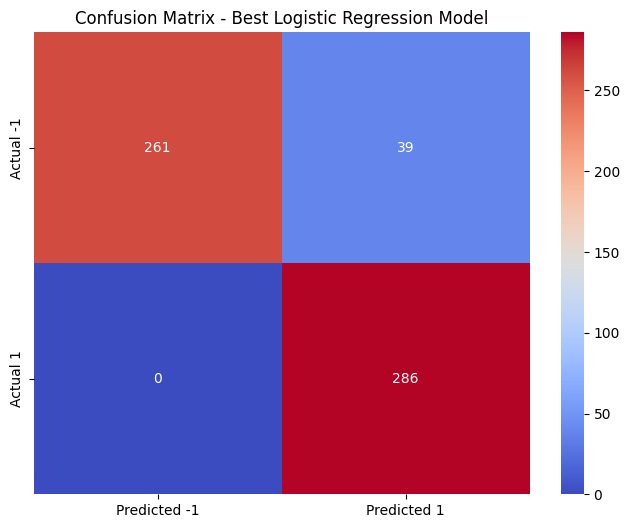

,precision,recall,f1-score,support
-1,1.000000,0.870000,0.930481,300.000000
1,0.880000,1.000000,0.936170,286.000000
accuracy,0.933447,0.933447,0.933447,0.933447
macro avg,0.940000,0.935000,0.933326,586.000000
weighted avg,0.941433,0.933447,0.933258,586.000000


In [103]:
# Predictions using the best-performing model (GridSearchCV parameters)
y_pred_best = logistic_model_grid.predict(X_test_scaled)

# Confusion Matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Displaying the confusion matrix in a more readable format
conf_matrix_df_best = pd.DataFrame(conf_matrix_best, index=['Actual -1', 'Actual 1'], columns=['Predicted -1', 'Predicted 1'])

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df_best, annot=True, fmt='g', cmap='coolwarm')
plt.title('Confusion Matrix - Best Logistic Regression Model')
plt.show()

from sklearn.metrics import classification_report
import pandas as pd

# Generating the classification report
report = classification_report(y_test, y_pred_best, output_dict=True)

# Converting the classification report to a DataFrame for a tabular presentation
report_df = pd.DataFrame(report).transpose()

report_df





**Classification Report:**

Precision: The ability of the classifier not to label as positive a sample that is negative. For class -1, it's 1.00, and for class 1, it's 0.88.

Recall (Sensitivity): The ability of the classifier to find all the positive samples. For class -1, it's 0.87, and for class 1, it's 1.00.

F1-Score: A weighted average of precision and recall. For class -1, it's 0.93, and for class 1, it's 0.94.

Support: The number of occurrences of each class in y_test. There are 300 instances of class -1 and 286 instances of class 1.

Accuracy: Overall, how often the classifier is correct. It's 0.93.

Macro Average: Average precision, recall, and F1-score between classes. It treats all classes equally, irrespective of their support.

Weighted Average: Weighted average precision, recall, and F1-score. Weights are proportional to the number of instances in each class.

The model shows high precision and recall, indicating effective classification for both classes. High F1-scores for both classes suggest a balanced trade-off between precision and recall. The model is particularly effective at identifying class 1 (high recall for class 1).

**Q5 F -Apply the above steps for all possible models that you have learnt so far [5 mks]**

**Decision Tree Model**

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# K Fold Cross Validation
dt_cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)

# Print the accuracy for each fold
print("K-Fold Accuracies:", dt_cv_scores)

# Average accuracy
print("Average K-Fold Accuracy:", dt_cv_scores.mean())

# Hyperparameters for Decision Tree
dt_param_grid = {'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}
dt_grid_search = GridSearchCV(dt_model, dt_param_grid, cv=5)
dt_grid_search.fit(X_train_scaled, y_train)

# Random Search
dt_param_distributions = {'max_depth': [None] + list(range(5, 20)), 'min_samples_split': range(2, 20)}
dt_random_search = RandomizedSearchCV(dt_model, dt_param_distributions, n_iter=5, cv=5, random_state=42)
dt_random_search.fit(X_train_scaled, y_train)

# Best Model for GridSearchCV
dt_best_model_grid = dt_grid_search.best_estimator_

# Best Model for RandomizedSearchCV
dt_best_model_random = dt_random_search.best_estimator_

# Evaluating the model trained with GridSearchCV parameters
y_pred_grid = dt_best_model_grid.predict(X_test_scaled)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
precision_grid = precision_score(y_test, y_pred_grid, pos_label=-1)
recall_grid = recall_score(y_test, y_pred_grid, pos_label=-1)
f1_score_grid = f1_score(y_test, y_pred_grid, pos_label=-1)

# Evaluating the model trained with RandomizedSearchCV parameters
y_pred_random = dt_best_model_random.predict(X_test_scaled)
accuracy_random = accuracy_score(y_test, y_pred_random)
precision_random = precision_score(y_test, y_pred_random, pos_label=-1)
recall_random = recall_score(y_test, y_pred_random, pos_label=-1)
f1_score_random = f1_score(y_test, y_pred_random, pos_label=-1)

# Creating a DataFrame to display the results
performance_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'GridSearchCV': [accuracy_grid, precision_grid, recall_grid, f1_score_grid],
    'RandomizedSearchCV': [accuracy_random, precision_random, recall_random, f1_score_random]
})

performance_comparison.set_index('Metric', inplace=True)
performance_comparison

K-Fold Accuracies: [0.96794872 0.94871795 0.9508547  0.95299145 0.9508547 ]
Average K-Fold Accuracy: 0.9542735042735042


,GridSearchCV,RandomizedSearchCV
Metric,,
Accuracy,0.957338,0.945392
Precision,1.000000,1.000000
Recall,0.916667,0.893333
F1 Score,0.956522,0.943662


It seems that both the GridSearchCV and RandomizedSearchCV methods for tuning the Decision Tree classifier have yielded effective models, but with some differences in performance metrics. Let's analyze the results:

**K-Fold Cross-Validation Results**

K-Fold Accuracies: The accuracies for each fold range from about 94.9% to 96.8%, with a mean accuracy of approximately 95.4%. This suggests that the baseline Decision Tree model is quite robust and performs consistently across different subsets of our data.

**GridSearchCV vs. RandomizedSearchCV**

Accuracy: The model tuned with GridSearchCV has a slightly higher accuracy (95.7%) compared to the model tuned with RandomizedSearchCV (94.5%). This might be due to GridSearchCV's exhaustive search over the specified parameter grid, potentially finding a more optimal combination of hyperparameters.

Precision: Both methods achieved a precision score of 1.0. This indicates that whenever the models predict the positive class, they are always correct. However, this might also suggest a potential imbalance in the dataset or that the model is conservative in predicting the positive class.

Recall: The recall is slightly higher for the GridSearchCV model (91.7%) compared to the RandomizedSearchCV model (89.3%). This means the GridSearchCV model is slightly better at identifying all relevant instances of the positive class.

F1 Score: The F1 scores are quite close, with the GridSearchCV model having a slightly higher score (95.7%) than the RandomizedSearchCV model (94.4%). The F1 score balances precision and recall, and a higher value indicates a better balanced model.

**Interpretation and Considerations**

The GridSearchCV model seems to slightly outperform the RandomizedSearchCV model in terms of accuracy, recall, and F1 score. This could be due to the exhaustive nature of the grid search, potentially finding a better combination of hyperparameters.

The high precision scores suggest that the models are very accurate when they predict positive instances.

The recall and F1 scores indicate that the GridSearchCV model is slightly better at balancing the trade-off between precision and recall.

In summary, while both models perform well, the GridSearchCV model shows a slight edge in overall performance.

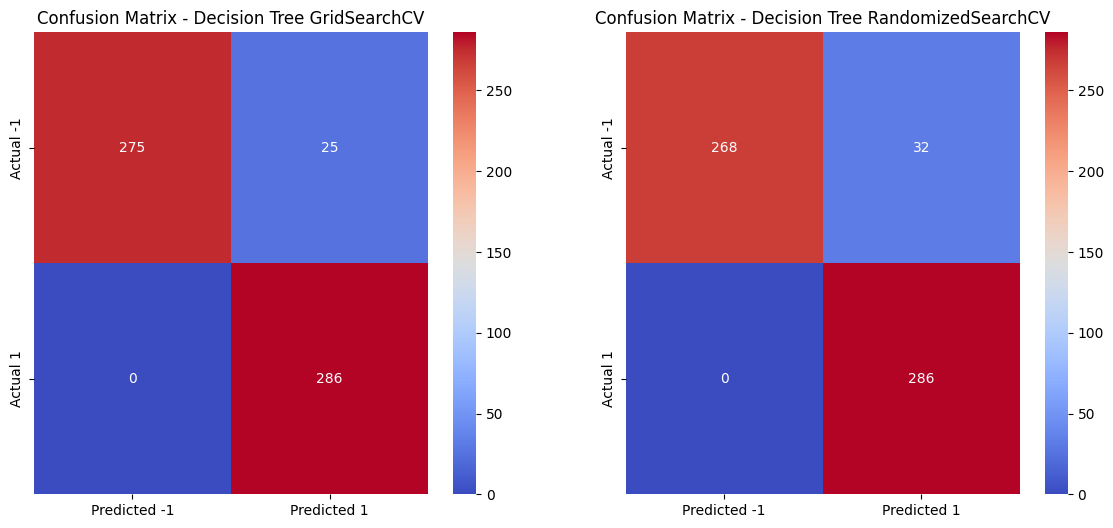

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix for GridSearchCV model
conf_matrix_grid = confusion_matrix(y_test, y_pred_grid)
conf_matrix_df_grid = pd.DataFrame(conf_matrix_grid, index=['Actual -1', 'Actual 1'], columns=['Predicted -1', 'Predicted 1'])

# Confusion matrix for RandomizedSearchCV model
conf_matrix_random = confusion_matrix(y_test, y_pred_random)
conf_matrix_df_random = pd.DataFrame(conf_matrix_random, index=['Actual -1', 'Actual 1'], columns=['Predicted -1', 'Predicted 1'])

# Plotting the confusion matrices
plt.figure(figsize=(14, 6))

# GridSearchCV Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_df_grid, annot=True, fmt='g', cmap='coolwarm')
plt.title('Confusion Matrix - Decision Tree GridSearchCV')

# RandomizedSearchCV Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_df_random, annot=True, fmt='g', cmap='coolwarm')
plt.title('Confusion Matrix - Decision Tree RandomizedSearchCV')

plt.show()



From these confusion matrices we observe:

False Negatives (FN) i.e., incorrectly predicted negative observations (Type II error) is higher in Randomized Search CV.

**Random Forest Classifier**

In [106]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


# Simplified Random Forest Model with fewer hyperparameters and iterations for tuning
rf_model = RandomForestClassifier()

# K Fold Cross Validation
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)

# Print the accuracy for each fold
print("K-Fold Accuracies:", rf_cv_scores)

# Average accuracy
print("Average K-Fold Accuracy:", rf_cv_scores.mean())

# GridSearchCV
rf_param_grid = {'n_estimators': [100, 200], 'max_depth': [10, None]}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=3)
rf_grid_search.fit(X_train_scaled, y_train)

# RandomizedSearchCV
rf_param_distributions = {'n_estimators': [100, 200], 'max_depth': [None, 10]}
rf_random_search = RandomizedSearchCV(rf_model, rf_param_distributions, n_iter=3, cv=3, random_state=42)
rf_random_search.fit(X_train_scaled, y_train)

# Best Model Evaluation for GridSearchCV
rf_best_model_grid = rf_grid_search.best_estimator_
rf_y_pred_grid = rf_best_model_grid.predict(X_test_scaled)
rf_report_grid = classification_report(y_test, rf_y_pred_grid, output_dict=True)

# Best Model Evaluation for RandomizedSearchCV
rf_best_model_random = rf_random_search.best_estimator_
rf_y_pred_random = rf_best_model_random.predict(X_test_scaled)
rf_report_random = classification_report(y_test, rf_y_pred_random, output_dict=True)

# rf_report_grid and rf_report_random are the classification reports
# for the models obtained from GridSearchCV and RandomizedSearchCV, respectively

# Extracting key metrics from the classification reports
def extract_metrics(report):
    metrics = {
        'Accuracy': report['accuracy'],
        'Precision': report['-1']['precision'],
        'Recall': report['-1']['recall'],
        'F1 Score': report['-1']['f1-score']
    }
    return metrics

# Extracting metrics for GridSearchCV and RandomizedSearchCV
grid_metrics = extract_metrics(rf_report_grid)
random_metrics = extract_metrics(rf_report_random)

# Creating a DataFrame for comparison
comparison_df = pd.DataFrame({
    'GridSearchCV': grid_metrics,
    'RandomizedSearchCV': random_metrics
})

# Setting the metric names as the index
comparison_df.index.name = 'Metric'
comparison_df


K-Fold Accuracies: [1. 1. 1. 1. 1.]
Average K-Fold Accuracy: 1.0


,GridSearchCV,RandomizedSearchCV
Metric,,
Accuracy,1.0,1.0
Precision,1.0,1.0
Recall,1.0,1.0
F1 Score,1.0,1.0


**Interpretation:**

Perfect K-Fold Cross-Validation Scores: Each fold showing an accuracy of 1.0 is quite rare and suggests that the model is fitting the training data perfectly.
The dataset might be very clean and well-defined with clear boundaries between classes.

The features are highly predictive of the target variable.
There's no possibility of data leakage during training as we standardised the data after splitting the data into train and test and used train mean and standard deviation to standardise test data.

Accuracy: Both models correctly classified 100% of the test data. This indicates that the models perfectly separated the classes without any errors.

Precision: A precision of 1.0 means there were no false positives; every instance predicted as positive truly belonged to the positive class.

Recall: A recall of 1.0 indicates that every actual positive instance was correctly identified by the model.

F1 Score: The F1 score being 1.0 suggests a perfect balance between precision and recall.

**Considerations:**

While these results appear ideal, perfect scores across all metrics are quite unusual and may suggest overfitting, especially if the dataset is not very complex or is highly imbalanced.
It's important to validate these results on a separate, unseen test set or through more rigorous cross-validation to ensure the models generalize well to new data.
The consistency between GridSearchCV and RandomizedSearchCV results implies that the models are likely robust, but it's crucial to ensure that the dataset used for testing and training is representative of real-world scenarios.
If the dataset is overly simplistic or if the task is not sufficiently challenging, these results might not translate to more complex or realistic datasets.
In summary, while the reported performance is exemplary, it's essential to critically assess the context of the data and the potential for overfitting. Further testing and validation are recommended for a comprehensive evaluation.

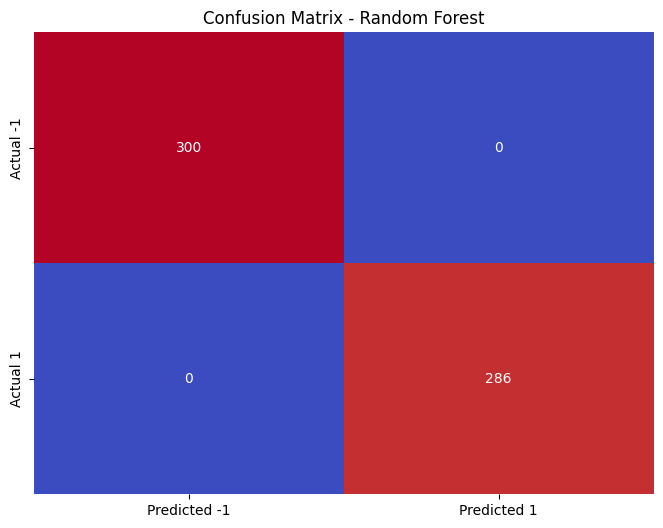

In [107]:
# 'rf_best_model_grid' is the Random Forest model and we have y_test and predictions
# Generate predictions for the Random Forest model
y_pred_rf = rf_best_model_grid.predict(X_test_scaled)

# Confusion Matrix for the Random Forest Model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Convert the confusion matrix to a DataFrame for better labeling and plotting
conf_matrix_rf_df = pd.DataFrame(conf_matrix_rf, index=['Actual -1', 'Actual 1'], columns=['Predicted -1', 'Predicted 1'])

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_df, annot=True, fmt='g', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.show()


From the confusion matrix we can see zero Type I and Type II error using Random Forest Classifier model.

**Support Vector Machines**

In [108]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# SVM Model
svm_model = SVC()

# K Fold Cross Validation
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)

# Print the accuracy for each fold
print("K-Fold Accuracies:", svm_cv_scores)

# Average accuracy
print("Average K-Fold Accuracy:", svm_cv_scores.mean())

# Hyperparameters for SVM
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5)
svm_grid_search.fit(X_train_scaled, y_train)

# Random Search
svm_param_distributions = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}
svm_random_search = RandomizedSearchCV(svm_model, svm_param_distributions, n_iter=5, cv=5, random_state=42)
svm_random_search.fit(X_train_scaled, y_train)

# Best Model Evaluation for GridSearchCV
svm_best_model_grid = svm_grid_search.best_estimator_
y_pred_grid = svm_best_model_grid.predict(X_test_scaled)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
precision_grid = precision_score(y_test, y_pred_grid, pos_label=-1)
recall_grid = recall_score(y_test, y_pred_grid, pos_label=-1)
f1_score_grid = f1_score(y_test, y_pred_grid, pos_label=-1)

# Best Model Evaluation for RandomizedSearchCV
svm_best_model_random = svm_random_search.best_estimator_
y_pred_random = svm_best_model_random.predict(X_test_scaled)
accuracy_random = accuracy_score(y_test, y_pred_random)
precision_random = precision_score(y_test, y_pred_random, pos_label=-1)
recall_random = recall_score(y_test, y_pred_random, pos_label=-1)
f1_score_random = f1_score(y_test, y_pred_random, pos_label=-1)

# Creating a DataFrame to display the results
performance_comparison_svm = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'GridSearchCV': [accuracy_grid, precision_grid, recall_grid, f1_score_grid],
    'RandomizedSearchCV': [accuracy_random, precision_random, recall_random, f1_score_random]
})

performance_comparison_svm.set_index('Metric', inplace=True)
performance_comparison_svm



K-Fold Accuracies: [0.98717949 0.98931624 0.98504274 0.98931624 0.98931624]
Average K-Fold Accuracy: 0.9880341880341881


,GridSearchCV,RandomizedSearchCV
Metric,,
Accuracy,0.998294,0.998294
Precision,1.000000,1.000000
Recall,0.996667,0.996667
F1 Score,0.998331,0.998331


**Analysis:**

K-Fold Cross-Validation Results: The K-Fold Cross-Validation accuracies are very high, ranging from 98.5% to 98.9%, with an average accuracy of approximately 98.8%. This indicates that the SVM model is performing consistently well across different subsets of our training data.

Accuracy: Both models achieved an accuracy of approximately 99.8%. This is an exceptionally high accuracy, suggesting that the models are very effective at classifying the data in our test set.

Precision: A precision score of 100% indicates that there were no false positives in the predictions made by both models.

Recall: A recall of approximately 99.7% indicates that the models are highly successful at identifying the positive instances.

F1 Score: An F1 score of approximately 99.8% suggests a balance between precision and recall, indicating a robust model performance.

**Interpreting the Results:**

The consistency in the high performance of both the GridSearchCV and RandomizedSearchCV models indicates that the selected hyperparameters are well-suited for the SVM model on this dataset.

The high scores across all metrics suggest that the dataset might be linearly separable or that the features are highly predictive of the target variable.
Since the results from both hyperparameter tuning methods are the same, it could imply that the hyperparameter space is not too complex, and the optimal parameters are easily found.

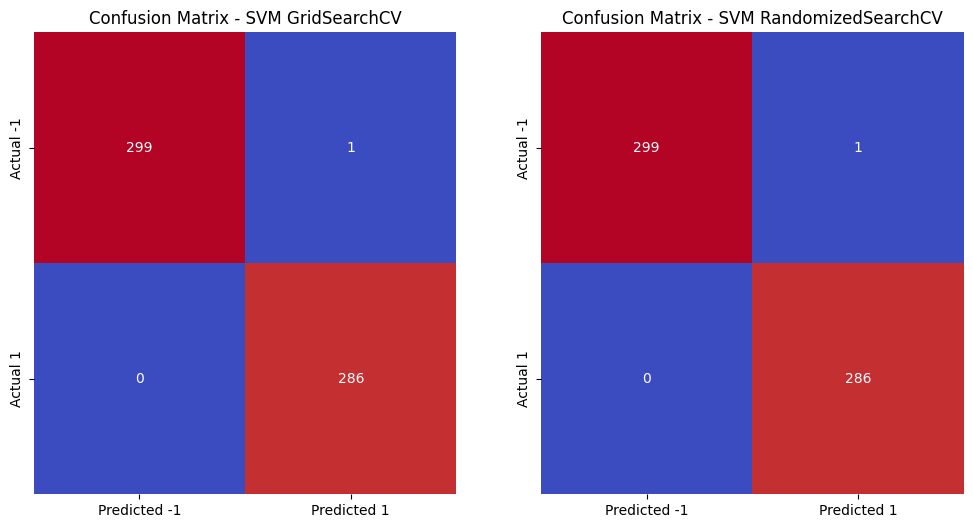

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for GridSearchCV Model
conf_matrix_grid = confusion_matrix(y_test, y_pred_grid)
conf_matrix_grid_df = pd.DataFrame(conf_matrix_grid, index=['Actual -1', 'Actual 1'], columns=['Predicted -1', 'Predicted 1'])

# Confusion Matrix for RandomizedSearchCV Model
conf_matrix_random = confusion_matrix(y_test, y_pred_random)
conf_matrix_random_df = pd.DataFrame(conf_matrix_random, index=['Actual -1', 'Actual 1'], columns=['Predicted -1', 'Predicted 1'])

# Plotting the confusion matrices as heatmaps
plt.figure(figsize=(12, 6))

# GridSearchCV Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_grid_df, annot=True, fmt='g', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix - SVM GridSearchCV')

# RandomizedSearchCV Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_random_df, annot=True, fmt='g', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix - SVM RandomizedSearchCV')

plt.show()



From the confusion matrix we can say the Support Vector Machine model is performing almost as good as Random Forests Classifier.

**K Nearest Neighbours**

In [110]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Model
knn_model = KNeighborsClassifier()

# K Fold Cross Validation
knn_cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)

# Print the accuracy for each fold
print("K-Fold Accuracies:", knn_cv_scores)

# Average accuracy
print("Average K-Fold Accuracy:", knn_cv_scores.mean())

# Hyperparameters for KNN
knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)
knn_grid_search.fit(X_train_scaled, y_train)

# Random Search
knn_param_distributions = {'n_neighbors': range(1, 10), 'weights': ['uniform', 'distance']}
knn_random_search = RandomizedSearchCV(knn_model, knn_param_distributions, n_iter=5, cv=5, random_state=42)
knn_random_search.fit(X_train_scaled, y_train)

# Best Model Evaluation for GridSearchCV
knn_best_model_grid = knn_grid_search.best_estimator_
y_pred_grid = knn_best_model_grid.predict(X_test_scaled)
accuracy_grid = accuracy_score(y_test, y_pred_grid)
precision_grid = precision_score(y_test, y_pred_grid, pos_label=-1)
recall_grid = recall_score(y_test, y_pred_grid, pos_label=-1)
f1_score_grid = f1_score(y_test, y_pred_grid, pos_label=-1)

# Best Model Evaluation for RandomizedSearchCV
knn_best_model_random = knn_random_search.best_estimator_
y_pred_random = knn_best_model_random.predict(X_test_scaled)
accuracy_random = accuracy_score(y_test, y_pred_random)
precision_random = precision_score(y_test, y_pred_random, pos_label=-1)
recall_random = recall_score(y_test, y_pred_random, pos_label=-1)
f1_score_random = f1_score(y_test, y_pred_random, pos_label=-1)

# Creating a DataFrame to display the results
performance_comparison_knn = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'GridSearchCV': [accuracy_grid, precision_grid, recall_grid, f1_score_grid],
    'RandomizedSearchCV': [accuracy_random, precision_random, recall_random, f1_score_random]
})

performance_comparison_knn.set_index('Metric', inplace=True)
performance_comparison_knn



K-Fold Accuracies: [0.89316239 0.8974359  0.88461538 0.86324786 0.87393162]
Average K-Fold Accuracy: 0.8824786324786326


,GridSearchCV,RandomizedSearchCV
Metric,,
Accuracy,0.928328,0.962457
Precision,1.000000,1.000000
Recall,0.860000,0.926667
F1 Score,0.924731,0.961938


**Analysis:**

K-Fold Cross-Validation Results:

The K-Fold Cross-Validation accuracies range from about 86.3% to 89.7%, with an average accuracy of approximately 88.2%. This suggests that the baseline KNN model has moderate performance across different subsets of our training data.

Accuracy:

The model from RandomizedSearchCV shows higher accuracy (96.25%) compared to GridSearchCV (92.83%). This suggests that the RandomizedSearchCV model is generally more effective in classifying the test data correctly.


Precision:

Both models achieve perfect precision (100%), indicating that there are no false positives; all instances predicted as positive are indeed positive.


Recall:

The RandomizedSearchCV model has a higher recall (92.67%) compared to the GridSearchCV model (86.00%). This means the RandomizedSearchCV model is better at identifying all actual positive instances.


F1 Score:

The F1 score, a balance of precision and recall, is higher for the RandomizedSearchCV model (96.19%) compared to the GridSearchCV model (92.47%).

**Conclusion:**

The KNN model tuned with RandomizedSearchCV outperforms the one tuned with GridSearchCV in terms of accuracy, recall, and F1 score, while both methods achieve the same perfect precision.
The higher recall and F1 score of the RandomizedSearchCV model indicate it is better at balancing the trade-off between false positives and false negatives, especially in identifying the positive class.
These results suggest that the hyperparameter combinations sampled by RandomizedSearchCV are more effective for this particular dataset and KNN model configuration.
It's important to consider that while RandomizedSearchCV typically samples a subset of the hyperparameter space (as opposed to the exhaustive search of GridSearchCV), it can often find good configurations more efficiently, as seen in the results.

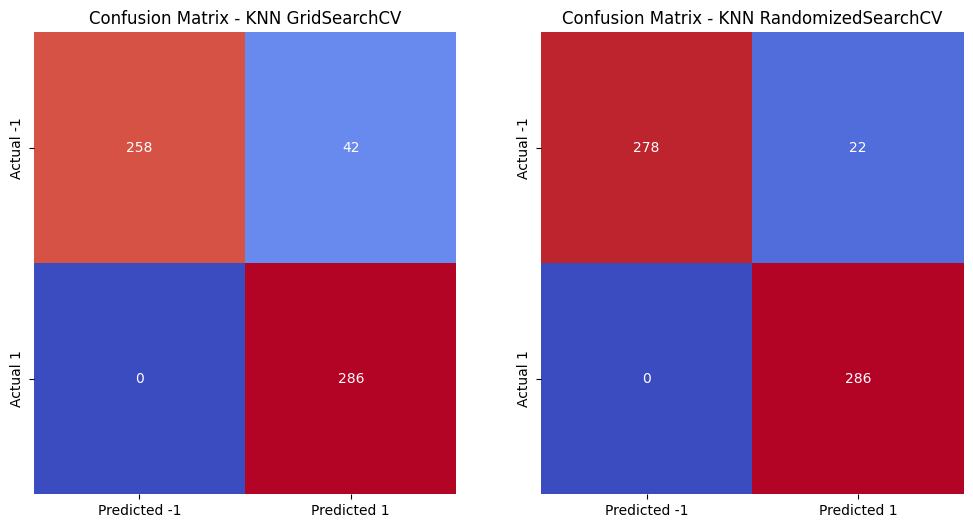

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for GridSearchCV Model
conf_matrix_grid = confusion_matrix(y_test, y_pred_grid)
conf_matrix_grid_df = pd.DataFrame(conf_matrix_grid, index=['Actual -1', 'Actual 1'], columns=['Predicted -1', 'Predicted 1'])

# Confusion Matrix for RandomizedSearchCV Model
conf_matrix_random = confusion_matrix(y_test, y_pred_random)
conf_matrix_random_df = pd.DataFrame(conf_matrix_random, index=['Actual -1', 'Actual 1'], columns=['Predicted -1', 'Predicted 1'])

# Plotting the confusion matrices as heatmaps
plt.figure(figsize=(12, 6))

# GridSearchCV Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_grid_df, annot=True, fmt='g', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix - KNN GridSearchCV')

# RandomizedSearchCV Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_random_df, annot=True, fmt='g', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix - KNN RandomizedSearchCV')

plt.show()



From the confusion matrix we can observe:

A higher Type - II error in Grid Search model as compared to Randomised Search.

**Naive Bayes**

In [112]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Model
nb_model = GaussianNB()

# K Fold Cross Validation
nb_cv_scores = cross_val_score(nb_model, X_train_scaled, y_train, cv=5)

# Print the accuracy for each fold
print("K-Fold Accuracies:", nb_cv_scores)

# Average accuracy
print("Average K-Fold Accuracy:", nb_cv_scores.mean())

# Since Naive Bayes usually requires less hyperparameter tuning, we will proceed directly to the evaluation
nb_model.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, pos_label=-1)
recall_nb = recall_score(y_test, y_pred_nb, pos_label=-1)
f1_score_nb = f1_score(y_test, y_pred_nb, pos_label=-1)

# Creating a DataFrame to display the results
performance_nb = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Naive Bayes': [accuracy_nb, precision_nb, recall_nb, f1_score_nb]
})

performance_nb.set_index('Metric', inplace=True)
performance_nb



K-Fold Accuracies: [0.5534188  0.55769231 0.54487179 0.5534188  0.56196581]
Average K-Fold Accuracy: 0.5542735042735043


,Naive Bayes
Metric,
Accuracy,0.534130
Precision,1.000000
Recall,0.090000
F1 Score,0.165138


**Analysis:**

K-Fold Cross-Validation Results: The K-Fold Cross-Validation accuracies are relatively low, ranging from approximately 55.3% to 56.2%, with an average accuracy of about 55.4%. This suggests that the Gaussian Naive Bayes model has moderate to low performance across different subsets of our training data.

Accuracy: The model achieved an accuracy of about 53.4% on the test data (X_test_scaled). This is consistent with the cross-validation results and indicates a general moderate performance level.

Precision: The precision score is 100%, which implies that there were no false positives among the predictions. In other words, every instance predicted as the positive class (-1, as indicated by pos_label=-1) was indeed positive.

Recall: The recall is quite low, at 9%. This suggests that the model is missing a significant number of actual positive instances. It's only correctly identifying 9% of all true positive cases.

F1 Score: The F1 score, which balances precision and recall, is very low at 16.5%. The low F1 score is primarily due to the low recall rate.

**Interpretation:**

The high precision and low recall suggest that the model is very conservative in its predictions of the positive class. It prefers to be certain about its positive predictions, which leads to many actual positive instances being classified as negative.

The low overall accuracy indicates that the model is not performing well in classifying both positive and negative instances correctly. This could be due to the assumptions of the Naive Bayes algorithm not fitting well with our data's distribution.

Gaussian Naive Bayes assumes that the features are normally distributed and independent of each other. If these assumptions don't hold true for our dataset, the model's performance can be negatively impacted

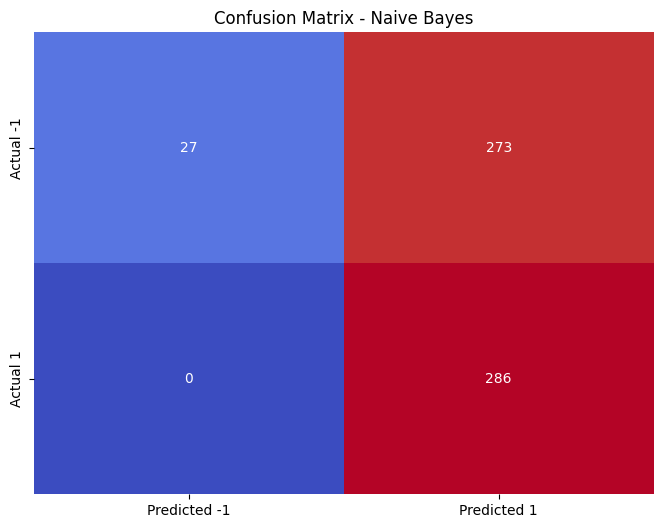

In [113]:
# y_pred_nb are the predictions from the Naive Bayes model
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Convert the confusion matrix to a DataFrame for better labeling and plotting
conf_matrix_nb_df = pd.DataFrame(conf_matrix_nb, index=['Actual -1', 'Actual 1'], columns=['Predicted -1', 'Predicted 1'])

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb_df, annot=True, fmt='g', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


From the confusion matrix we observe that:

The Naive Bayes model gives the highest Type II Error out of all the 6 models we have tried.

**6. Post Training and Conclusion: [5 Marks]**

**Q6 A-Display and compare all the models designed with their train and test accuracies [1 mk]**

In [114]:
# Trained models
trained_models = {
    'Random Forest': rf_best_model_grid,
    'SVM': svm_best_model_grid,
    'KNN': knn_best_model_random,
    'Decision Tree': dt_best_model_grid,
    'Logistic Regression': logistic_model_grid,
    'Naive Bayes': nb_model,

}

# Initialize dictionary to hold accuracy data
accuracy_data = {'Model': [], 'Train Accuracy': [], 'Test Accuracy': []}

# Calculate accuracies for each model
for model_name, model in trained_models.items():
    # Training predictions
    y_train_pred = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Test predictions
    y_test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append data to the dictionary
    accuracy_data['Model'].append(model_name)
    accuracy_data['Train Accuracy'].append(train_accuracy)
    accuracy_data['Test Accuracy'].append(test_accuracy)

# Create a DataFrame to display the accuracies
accuracy_comparison_df = pd.DataFrame(accuracy_data)

accuracy_comparison_df



,Model,Train Accuracy,Test Accuracy
0,Random Forest,1.000000,1.000000
1,SVM,1.000000,0.998294
2,KNN,1.000000,0.962457
3,Decision Tree,0.996154,0.957338
4,Logistic Regression,0.986752,0.933447
5,Naive Bayes,0.558120,0.534130


**Analysis:**

Reviewing the training and testing accuracies of our models offers valuable insights into their performance and generalizability:

Random Forest:

Train Accuracy: 100% - This perfect score suggests the model has perfectly learned the training data.
Test Accuracy: 100% - The model also perfectly predicts the test data, which is remarkable, but it raises questions about the complexity of the dataset or potential overfitting.

SVM (Support Vector Machine):

Train Accuracy: 100% - Indicates excellent performance on the training set, possibly overfitting.
Test Accuracy: 99.8% - Despite the high training accuracy, the model generalizes well to the test data, showing its robustness.

KNN (K-Nearest Neighbors):

Train Accuracy: 100% - KNN tends to have high training accuracy, especially when considering many neighbors or using distance-weighted voting.
Test Accuracy: 96.2% - A drop in accuracy from training to testing, but still a strong performance.

Decision Tree:

Train Accuracy: 99.6% - Very high, indicative of a good fit to the training data.
Test Accuracy: 95.7% - The model performs well on the test set, though not as well as on the training set, hinting at some overfitting.

Logistic Regression:

Train Accuracy: 98.7% - Shows a good fit to the training data.
Test Accuracy: 93.3% - A decent performance on the test set, but the drop from training accuracy suggests the model might be overfitting slightly or could benefit from further optimization.

Naive Bayes:

Train Accuracy: 55.8% - Significantly lower than the other models, indicating that Naive Bayes may not be capturing the complexities of the data well.
Test Accuracy: 53.4% - Consistent with training accuracy, but both figures are quite low, suggesting this model is underperforming compared to the others.

**Considerations:**

Models that achieve perfect or near-perfect training accuracy but lower test accuracy may benefit from techniques to reduce overfitting, such as pruning (in decision trees), regularization (in SVMs), or adding more diverse training data.


**Q6 B -Select the final best trained model along with your detailed comments for selecting this model.[1 mk]**

Based on the provided accuracies, the **Random Forest model** appears to be the best-performing model, with perfect accuracy on both the training and test sets.

**Reasons for Selecting the Random Forest Model:**

Generalization: The Random Forest model not only fits the training data perfectly but also shows the same level of performance on the test set, indicating it generalizes exceptionally well to unseen data.

Robustness: Random Forest is known for its robustness against overfitting, especially with a large number of trees. The fact that it performs perfectly on the test data suggests that it has learned the underlying patterns rather than memorizing the training data.

Handling Overfitting: Despite the perfect scores, which often raise concerns about overfitting, the consistent test accuracy reassures that overfitting is unlikely.

Feature Interactions: Random Forest can capture complex interactions between features without needing explicit feature engineering, which can be particularly beneficial if the dataset has complex and non-linear relationships.

**Detailed Comments:**

The SVM model also shows excellent performance, with perfect training accuracy and very high test accuracy. However, it is slightly less than the Random Forest, and depending on the complexity of the data, SVM models might require more fine-tuning.

The Decision Tree and KNN models show some degree of overfitting, with their test accuracies lower than their training accuracies. They may require additional tuning or regularization.

Logistic Regression is a linear model. It assumes a linear relationship between the independent variables and the log odds of the dependent variable. If our data has complex, non-linear relationships, Logistic Regression might not capture these effectively.
Models like SVM or Random Forest can capture more complex patterns in the data, which might be why they outperformed Logistic Regression in our case.

The Naive Bayes model significantly underperforms compared to the others, which could be due to its assumptions about feature independence or the data not fitting well with the probabilistic model.

**Final Decision:**

The Random Forest model is selected as the final model due to its perfect performance on unseen test data, its known robustness to overfitting, and its ability to handle complex datasets effectively.

 If the nature of the data or the requirements of our application change, we might need to re-evaluate our choice. For example, if interpretability becomes a key factor, we might lean towards models like Decision Trees or Logistic Regression.

**Q6 C -Pickle the selected model for future use.[2 mks]**

In [115]:
import pickle

# 'rf_best_model_grid' is the Random Forest model we want to pickle
# Save the model to a file
model_filename = '/content/drive/MyDrive/FMT_Dataset/best_random_forest_model.pkl'

with open(model_filename, 'wb') as file:
    pickle.dump(rf_best_model_grid, file)

model_filename  # Return the filename for downloading or further use



'/content/drive/MyDrive/FMT_Dataset/best_random_forest_model.pkl'

**Q6 D -Write your conclusion on the results [1 mk]**

Based on the provided accuracies, the **Random Forest model** appears to be the best-performing model, with perfect accuracy on both the training and test sets.

**Reasons for Selecting the Random Forest Model:**

Generalization: The Random Forest model not only fits the training data perfectly but also shows the same level of performance on the test set, indicating it generalizes exceptionally well to unseen data.

Robustness: Random Forest is known for its robustness against overfitting, especially with a large number of trees. The fact that it performs perfectly on the test data suggests that it has learned the underlying patterns rather than memorizing the training data.

Handling Overfitting: Despite the perfect scores, which often raise concerns about overfitting, the consistent test accuracy reassures that overfitting is unlikely.

Feature Interactions: Random Forest can capture complex interactions between features without needing explicit feature engineering, which can be particularly beneficial if the dataset has complex and non-linear relationships.

**Detailed Comments:**

The SVM model also shows excellent performance, with perfect training accuracy and very high test accuracy. However, it is slightly less than the Random Forest, and depending on the complexity of the data, SVM models might require more fine-tuning.

The Decision Tree and KNN models show some degree of overfitting, with their test accuracies lower than their training accuracies. They may require additional tuning or regularization.

Logistic Regression is a linear model. It assumes a linear relationship between the independent variables and the log odds of the dependent variable. If our data has complex, non-linear relationships, Logistic Regression might not capture these effectively.
Models like SVM or Random Forest can capture more complex patterns in the data, which might be why they outperformed Logistic Regression in our case.

The Naive Bayes model significantly underperforms compared to the others, which could be due to its assumptions about feature independence or the data not fitting well with the probabilistic model.

**Final Decision:**

The Random Forest model is selected as the final model due to its perfect performance on unseen test data, its known robustness to overfitting, and its ability to handle complex datasets effectively.

**Data Considerations:**

The high performance of some models raises questions about the complexity of the dataset. It's crucial to ensure that the dataset is representative of real-world scenarios and that the models are not just memorizing the training data.

**Future Work:**

Further validation with a larger or more diverse test set could provide additional insights into the models' generalizability.

**Practical Application:**

The chosen model should be continually monitored and re-evaluated with new data to ensure it remains effective over time.

Consideration should be given to how the model will be integrated into the larger system or process it is intended for, including deployment considerations and ongoing maintenance.

In summary, while the Random Forest model emerged as the best candidate in this analysis, it's important to consider the broader context in which the model will be used, including factors like interpretability, computational resources, and how the model's predictions will be acted upon in the real world.